In [32]:
import pandas as pd
df = pd.read_excel('https://query.data.world/s/rvigegdpmbwlxhnbwte5fsc46st2vg',engine='openpyxl')
df.to_excel("week1.xlsx",index=False)

In [2]:
df.head()

,Coach,School,Seasons Coaching,Wins,Losses,Win Percentage
0,Mark Few,Gonzaga,18,503,113,0.817
1,Roy Williams,North Carolina,29,816,216,0.791
2,John Calipari,Kentucky,25,652,191,0.773
3,Mike Krzyzewski,Duke,42,1071,330,0.764
4,Bill Self,Kansas,24,623,193,0.763


In [3]:
df.describe()

,Seasons Coaching,Wins,Losses,Win Percentage
count,101.000000,101.000000,101.000000,101.000000
mean,17.653465,368.653465,199.049505,0.643337
std,9.479911,203.455766,102.952453,0.055146
min,5.000000,94.000000,52.000000,0.573000
25%,10.000000,194.000000,116.000000,0.602000
50%,16.000000,352.000000,175.000000,0.630000
75%,23.000000,506.000000,278.000000,0.671000
max,42.000000,1071.000000,466.000000,0.817000


In [4]:
df.corr()

,Seasons Coaching,Wins,Losses,Win Percentage
Seasons Coaching,1.000000,0.967091,0.947701,0.165074
Wins,0.967091,1.000000,0.845604,0.370498
Losses,0.947701,0.845604,1.000000,-0.119090
Win Percentage,0.165074,0.370498,-0.119090,1.000000


In [5]:
import seaborn as sns

<AxesSubplot:>

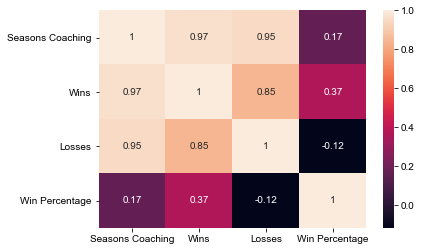

In [6]:
sns.heatmap(df.corr(),annot=True)

target will be Wins
feature that determines value of target is Seasons Coaching 

<AxesSubplot:xlabel='Seasons Coaching', ylabel='Wins'>

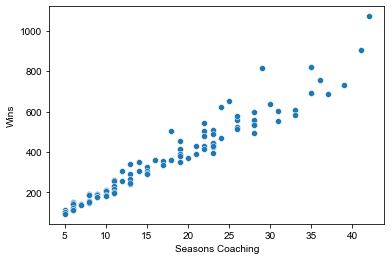

In [7]:
sns.scatterplot(
    x=df['Seasons Coaching'],
    y=df['Wins']
)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x = df['Seasons Coaching']
y = df['Wins']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x.to_numpy().reshape(-1,1),y.to_numpy().reshape(-1,1),train_size=0.70)

In [11]:
import xgboost

In [12]:
model = xgboost.XGBRegressor()

In [15]:
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
yhat = model.predict(x_test)

In [18]:
yhat

array([609.0005  , 276.0006  , 126.50026 , 651.9945  ,  99.001076,
       186.33354 , 191.66576 , 552.9997  , 191.66576 , 126.50026 ,
       223.20047 , 223.20047 , 388.99976 , 460.00043 , 298.668   ,
       254.99915 , 223.20047 , 651.9945  , 175.33409 , 175.33409 ,
       430.99994 , 126.50026 , 551.0023  , 305.99573 , 460.00043 ,
       126.50026 , 175.33409 ,  99.001076, 136.9952  , 486.2495  ,
       276.0006  ], dtype=float32)

In [21]:
y_test[:,0]

array([581, 290, 149, 471, 113, 180, 209, 513, 213, 139, 228, 234, 455,
       445, 328, 305, 215, 623, 148, 157, 388, 114, 601, 352, 397, 143,
       194, 102, 142, 430, 268], dtype=int64)

In [22]:
import matplotlib.pyplot as plt

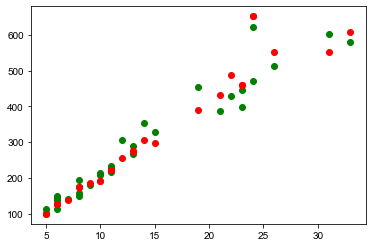

In [23]:
plt.scatter(x_test,y_test,color='green')
plt.scatter(x_test,yhat,color='red')

c:\Users\91978\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\91978\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

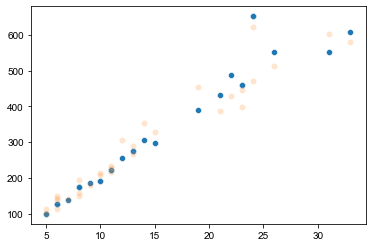

In [28]:
sns.scatterplot(x_test[:,0],yhat)
sns.scatterplot(x_test[:,0],y_test[:,0],alpha=0.2)